# 1 Průzkum dat a jejich úpravy

Volné zdroje dat
- https://archive.ics.uci.edu/ml/index.php
- https://www.kaggle.com/
- https://toolbox.google.com/datasetsearch
- github datasety

## 1.1 Zdroj dat

The Boston Housing Dataset

Soubor dat o bydlení je odvozen z informací o bydlení v oblasti Bostonu ve státě Massachusetts, které shromáždil americký úřad pro sčítání lidu.  

Údaje byly původně publikovány v článku od  Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

Datová sada obsahuje informace o 506 různých domech v Bostonu.

Dataset features
* CRIM - míra kriminality na obyvatele podle měst
* ZN - podíl pozemků pro bydlení s rozlohou nad 25 000 m2.
* INDUS - podíl neobchodních ploch pro podnikání na město
* CHAS - dummy proměnná Charles River (1, pokud trakt hraničí s řekou; 0 jinak)
* NOX - koncentrace oxidů dusíku (částic na 10 milionů)
* RM - průměrný počet pokojů na byt
* AGE - podíl vlastnických bytů postavených před rokem 1940
* DIS - vážené vzdálenosti do pěti bostonských center zaměstnanosti
* RAD - index dostupnosti k radiálním dálnicím
* TAX - sazba daně z nemovitosti v plné hodnotě na 10 000 dolarů
* PTRATIO - poměr žáků a učitelů podle měst
* B - 1000(Bk - 0,63)^2, kde Bk je podíl černochů v jednotlivých městech.
* LSTAT - procento nižšího stavu obyvatelstva
* MEDV - mediánová hodnota obydlí obývaných vlastníky v 1000 USD

## 1.2 Přečtení dat z CSV souboru

In [1]:
import pandas as pd 

In [3]:
data = pd.read_csv ("../dataset/HousingData.csv")

In [4]:
# informace o struktuře souboru
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 1.3 Základní charakteristiky data

Před tvorbou modelu je vhodné mít přehled o vstupních datech.
Tím lze předejít pozdějším problémům. Některé modely například vyžadují specifická data.

In [ ]:
# prvních 10 řádků
data.head(10)

Základní statistika dat ve sloupcích
- počet záznamů
- střední hodnota - průměr
- rozptyl
- minimum
- 25% percentil
- 50% percentil - medián
- 75% percentil
- maximum

U některých sloupců se výrazně liší průměr a medián - CRIM, ZN

U některých sloupců jsou průměr a medián podobné - RM

Dobře vidět to bude při zobrazení distribuce hodnot

In [ ]:
data.describe()

Některé sloupce obsahují data NULL. Musíme se rozhodnout, jak tento problém vyřešit.
* Neúplné řádky lze z datové sady odstranit
* Problematické sloupce by neměly být vstupními parametry modelu
* Chybějící hodnoty by mohly být vyrobeny jako průměr, nuly, ...
*...

In [ ]:
# kontrola NaN hodnot
data.isna().sum()

## 1.4 Distribuce hodnot

Vizualizace rozložení dat ve sloupcích by mohla objevit zkreslené, abnormální hodnoty.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

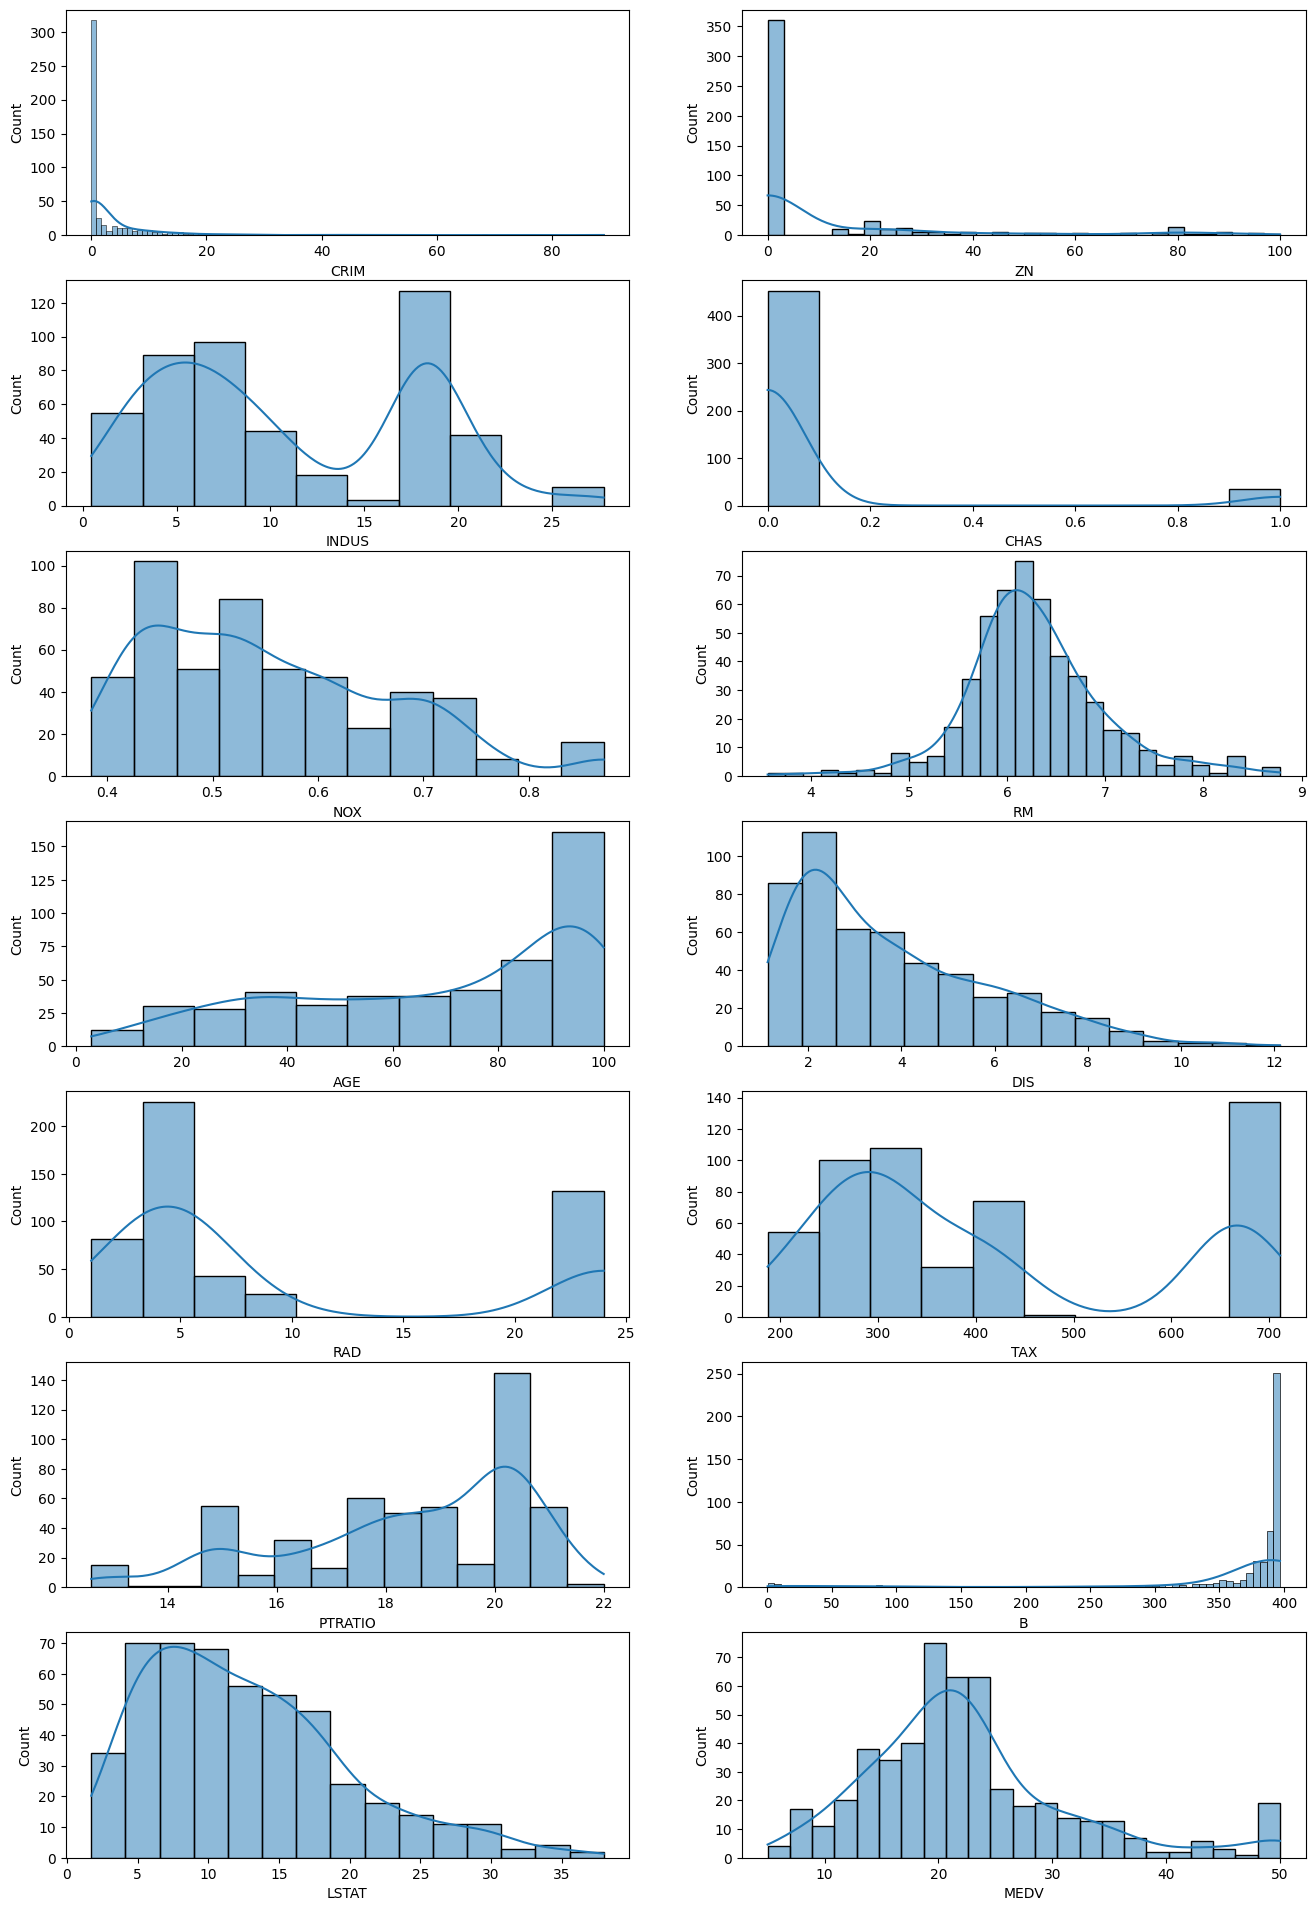

In [7]:
# zobrazení distribuce coločíselných hodnot s odhadem distribuční funkce
# kde=True, kernel density estimate line
pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

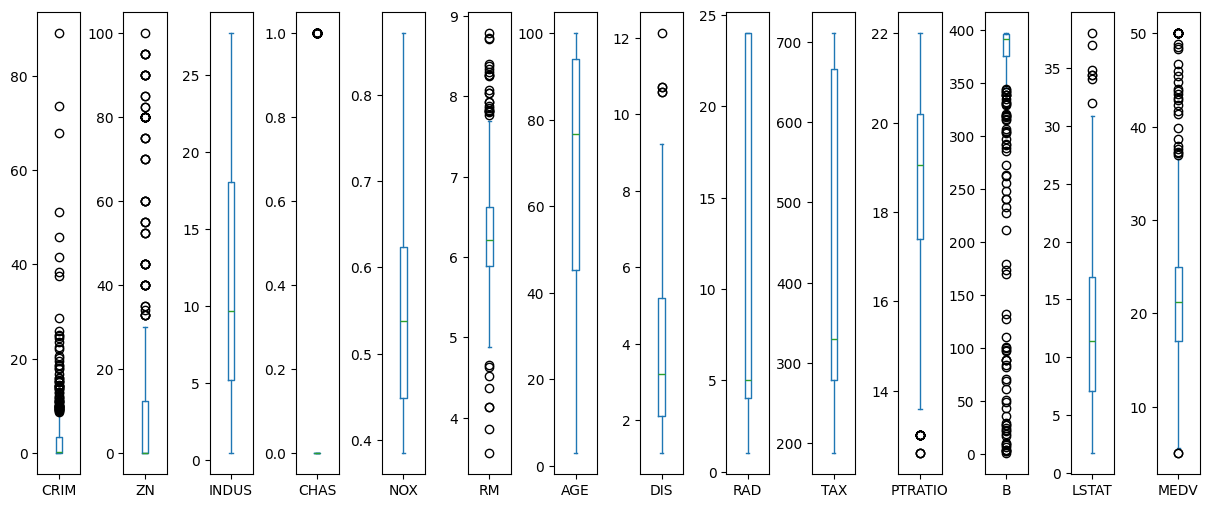

In [8]:
# stejné informace zobrazené v boxplotu
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

## 1.5 Vztahy mezi proměnnými

Vytvoření grafů pro všechny kombinace dvou funkcí by nám mohlo ukázat typ závislosti.

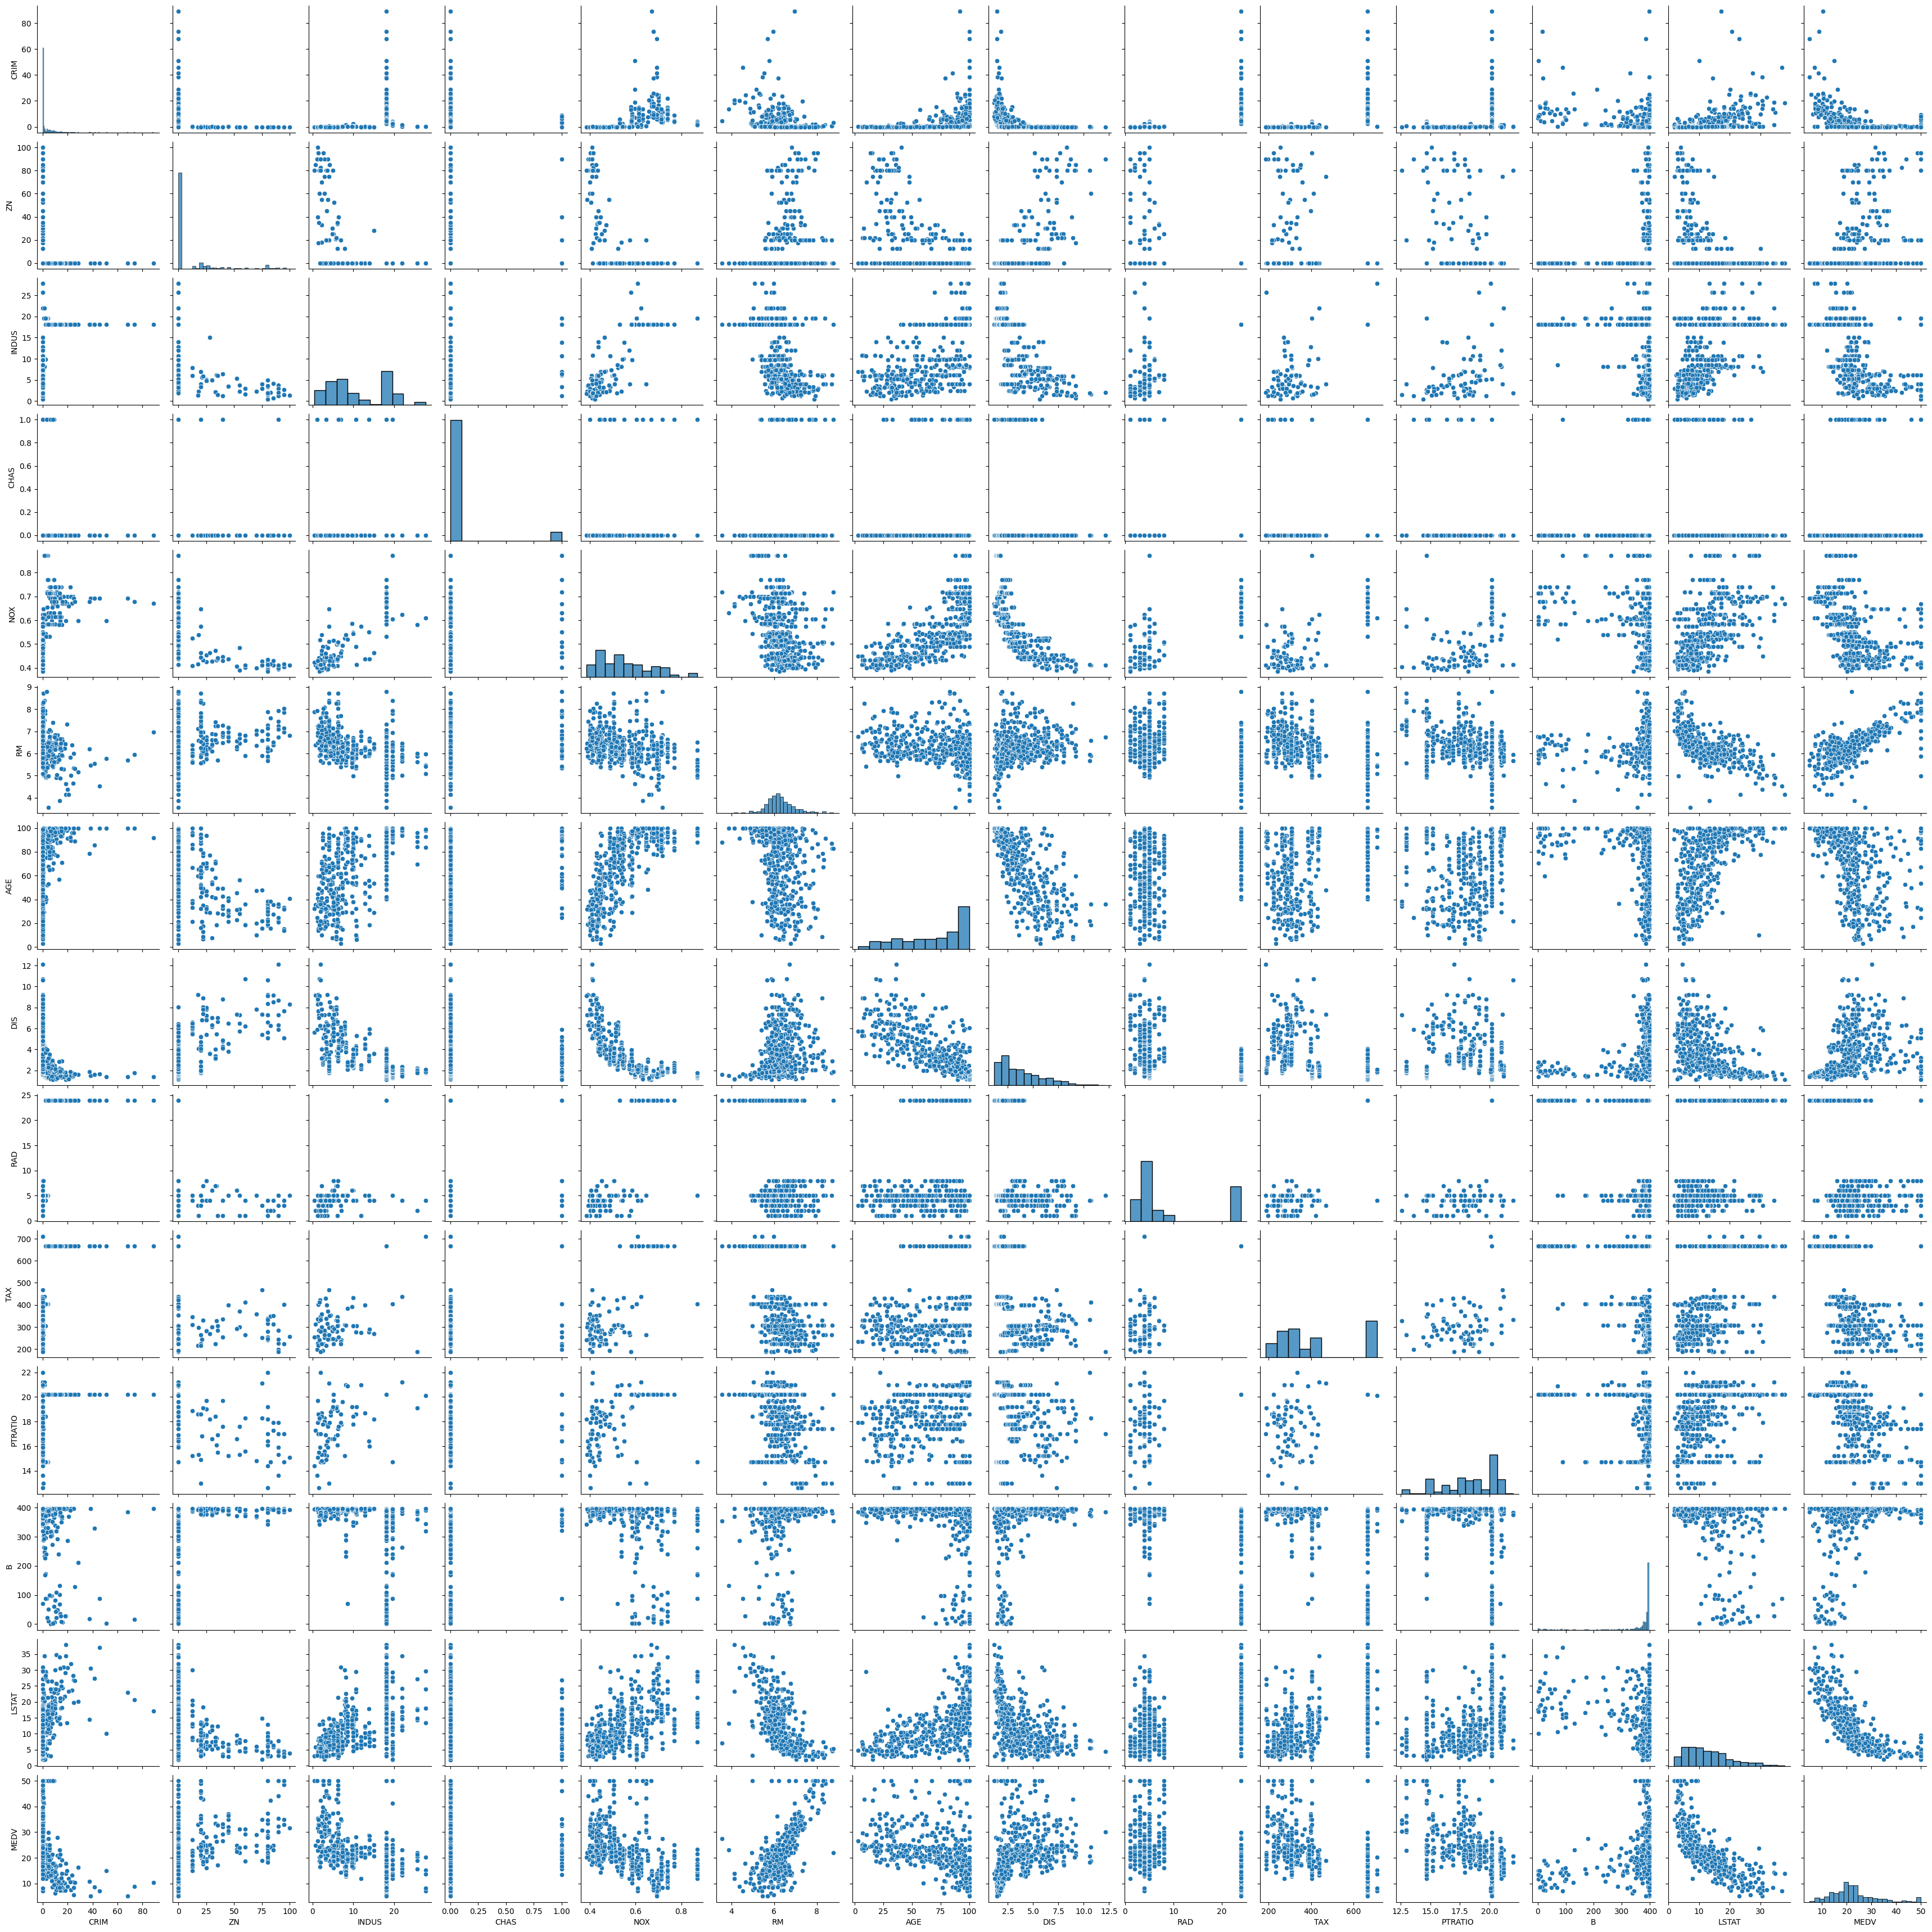

In [9]:
sns.pairplot(data)

Z grafů je vidět, že existuje určitá přímá uměra mezi RM, LSTAT a MEDV.

* RM - průměrný počet pokojů na byt (vstupní proměnná)
* LSTAT - procentuálně nižší stav populace (vstupní proměnná)
* MDEV - mediánová hodnota obydlí obývaných vlastníky v 1000 USD (výstupní proměnná)

Vztahy mezi proměnnými jsme odhadovali podle oka. Ale lze to i dělat exaktně pomocí korelace.

In [ ]:
corr=data.corr()
corr

Silná přímá nebo nepřímá korelace může naznačovat vztah mezi vstupními parametry.
To nám může pomoci při volbě vstupních parametrů modelu.

Někdy může být užitečné zobrazit korelace pomocí teplotní mapy.
Obzvláště pokud je korelační matice veliká, tak nám barvy mohou pomoci v orientaci.

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

Například sloupec CHAS (figurální proměnná Charles River) nemá žádnou souvislost s jinými prvky.

Naopak sloupce LSTAT, TAX, RAD, NOX, INDUS mají vztahy na další sloupce.

V příští hodině se bude snažit vytvořit statistický model, který na základě vstupních parametrů bude odhadovat cenu nemovitost MEDV.

Budeme k tomu používat lineární regresi.

Když se zaměříme na řádek MEDV, tak vhodnými vstupními parametry mohou být sloupce RM, LSTAT.

## 1.6 Úprava a standardizace dat

### 1.6.1 Vyčištění dat

Některé sloupce obsahují data NULL. Musíme se rozhodnout, jak tento problém vyřešit. 
* Neúplné řádky lze ze souboru dat odstranit.
* Problematické sloupce by neměly být vstupními parametry modelu.
* Záznamy s extremní hodnoty můžeme z datového setu vyloučit. Například protože se jedná o chyby měření.

In [ ]:
print (data.isnull().sum())

In [ ]:
data=data.dropna()

Někdy je užitečné vyřadit data s extrémními hodnotami. 
Z datového souboru odstraníme řádky, kde je mediánová hodnota domu vyšší než 50.

In [ ]:
data = data[~(data['MEDV'] >= 40.0)]

### 1.6.2 Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

In [ ]:
data["AGE"].mean()

In [ ]:
data["AGE"].std()

In [ ]:
data['AGE_STD'] = (data['AGE'] - data['AGE'].mean()) / data['AGE'].std()
data['LSTAT_STD'] = (data['LSTAT'] - data['LSTAT'].mean()) / data['LSTAT'].std()

In [ ]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           # pole jednotlivých grafů - 2 vedle sebe
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['AGE'],ax=ax1, kde=True)
sns.histplot(data['AGE_STD'],ax=ax2, kde=True)

In [ ]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           # pole jednotlivých grafů
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['LSTAT'],ax=ax1, kde=True)
sns.histplot(data['LSTAT_STD'],ax=ax2, kde=True)